#l

In [ ]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as pyo

pyo.init_notebook_mode()

import plotly.express as px

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = pd.read_csv('/content/moviestreams.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
df.shape

(16744, 17)

In [ ]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [ ]:
df.drop(['Unnamed: 0','ID'], axis = 1, inplace = True)

cols = df.columns.tolist()

cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

**Check For Missing Values**

Python recognise missing values as NaN

In [ ]:
df.isna()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
16740,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
16741,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True
16742,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

**Let`s remove the '+' sign attached to the values in the Age column**

In [ ]:
df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [ ]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [ ]:
age_map = {'18+':18,'7+':7,'13+':13, 'All':0, '16':16}

df['AgeCopy'] = df['Age'].map(age_map)
df['AgeCopy']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: AgeCopy, Length: 16744, dtype: float64

# Let`s remove the '%' sign attached to the values in the Rotten Tomatoes column

In [ ]:
df['New_Rotten_Tomatoes'] = df['Rotten Tomatoes'].str.replace('%','')

for i in df['New_Rotten_Tomatoes']:
  if i ==str:
    i.astype(int)

**Visualisations**

#What is the Number of movies for each age group?

In [ ]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

Top 10 Languages in Streaming Services

In [ ]:
df.Language.value_counts()

English                                                                             10955
Hindi                                                                                 503
English,Spanish                                                                       276
Spanish                                                                               267
English,French                                                                        174
                                                                                    ...  
English,German,Hungarian,Romanian                                                       1
English,Spanish,Chinese,Latin                                                           1
English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language        1
Dutch,French                                                                            1
English,Algonquin                                                                       1
Name: Lang

In [ ]:
language = df.Language.value_counts().head(10)

language.values

array([10955,   503,   276,   267,   174,   166,   163,   155,   151,
          93])

<Axes: title={'center': 'Top 10 Languages in Streaming services'}>

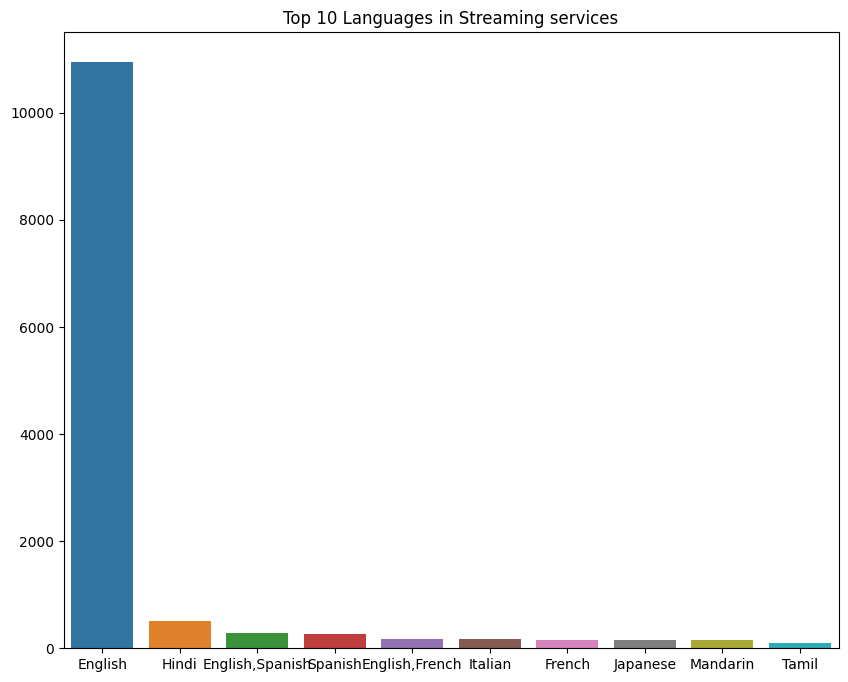

In [ ]:
language = df.Language.value_counts().head(10)

plt.figure(figsize=(10,8))

plt.title('Top 10 Languages in Streaming services')

sns.barplot(x=language.index, y=language.values)

In [ ]:
from IPython.display import HTML

import plotly.express as px

fig = px.pie(df,
             values=language.values,
             names=language,
             title='Top 10 Languages in Streaming Services')
HTML(fig.to_html())

Number of Movies in specific age group in All services

In [ ]:
from IPython.display import HTML
import plotly.express as px

fig = px.bar(df,
             x=df['Age'].value_counts().index,
             y=df['Age'].value_counts(),
             title='Number of Movies in specific age group in All services',
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number ofMovies in specific are group in Netflix

In [ ]:
from IPython.display import HTML
import plotly.express as px
netflix_df=df[df['Netflix']==1]
fig = px.bar(netflix_df,
             x=netflix_df['Age'].value_counts().index,
             y=netflix_df['Age'].value_counts(),
             title='Number of Movies in specific age group in Netflix',
             text=netflix_df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number ofMovies in specific are group in AmazonPrime Video

In [ ]:
from IPython.display import HTML
import plotly.express as px
prime_df=df[df['Prime Video']==1]
fig = px.bar(prime_df,
             x=prime_df['Age'].value_counts().index,
             y=prime_df['Age'].value_counts(),
             title='Number of Movies in specific age group in Amazon Prime',
             text=prime_df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number ofMovies in specific are group in Disney+

In [ ]:
from IPython.display import HTML
import plotly.express as px
Disney_df=df[df['Disney+']==1]
fig = px.bar(Disney_df,
             x=Disney_df['Age'].value_counts().index,
             y=Disney_df['Age'].value_counts(),
             title='Number of Movies in specific age group in Disney+',
             text=Disney_df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number ofMovies in specific are group in Hulu

In [ ]:
from IPython.display import HTML
import plotly.express as px
Hulu_df=df[df['Hulu']==1]
fig = px.bar(Hulu_df,
             x=Hulu_df['Age'].value_counts().index,
             y=Hulu_df['Age'].value_counts(),
             title='Number of Movies in specific age group in Hulu',
             text=Hulu_df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

# Rotten Tomatoes Score

Rotten Tomato Rating For Overall Services

In [ ]:
from IPython.display import HTML
import plotly.express as px
Hulu_df=df[df['Hulu']==1]
fig = px.bar(df,
             x=df['Rotten Tomatoes'].value_counts().index,
             y=df['Rotten Tomatoes'].value_counts(),
             title="Overall Rotten Tomatoes Ratings",
             text=df['Rotten Tomatoes'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Rotten Tomato Rating For Each Services

In [ ]:
rt_scores=pd.DataFrame({'Streaming Service':['Prime Video', 'Hulu','Disney+','Netflix'],
  'Rotten Tomatoes Score':[ netflix_df['Rotten Tomatoes'].value_counts()[0],
                          prime_df['Rotten Tomatoes'].value_counts()[0],
                          Disney_df['Rotten Tomatoes'].value_counts()[0],
                          Hulu_df['Rotten Tomatoes'].value_counts()[0] 
]})


rt_scores.head()

,Streaming Service,Rotten Tomatoes Score
0,Prime Video,130
1,Hulu,257
2,Disney+,19
3,Netflix,18


In [ ]:
sort_rt_scores=rt_scores.sort_values(ascending=False, by='Rotten Tomatoes Score')

In [ ]:
sort_rt_scores

,Streaming Service,Rotten Tomatoes Score
1,Hulu,257
0,Prime Video,130
2,Disney+,19
3,Netflix,18


In [ ]:
fig = px.bar(sort_rt_scores,
             x=sort_rt_scores['Streaming Service'],
             y=sort_rt_scores['Rotten Tomatoes Score'],
             title="Rotten Tomatoes Ratings For Each Service",
             text=sort_rt_scores['Rotten Tomatoes Score'],
             height=600)
fig.update_traces(marker_color='purple', texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

IMDB Ratings

In [ ]:
from IPython.display import HTML
import plotly.express as px

fig = px.bar(df,
             x=df['IMDb'].value_counts().index,
             y=df['IMDb'].value_counts(),
             title="Overall IMDb Ratings",
             text=df['IMDb'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Count Of Runtime of Movies

In [ ]:
RuntimeCount=pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(), 
                          columns=['Runtime','Count'] )


RuntimeCount

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
152,19.0,8
153,32.0,8
154,9.0,8
155,7.0,8


In [ ]:
fig = px.bar(df,
             x=RuntimeCount['Runtime'],
             y=RuntimeCount['Count'],
             title="Count Of Runtime Of Movies",
             text=RuntimeCount['Runtime'],
             height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Directors And Their Count Of Movies They Have Directed

In [ ]:
df['Directors'] = df['Directors'].astype('str')


In [ ]:
# new_data=df[df['Directors'] !=np.nan]

# directors_count=dict()

# direc_in_data=list(new_data['Directors'])

# for xdir in direc_in_data:
#   curr_dirs=xdir.split(',')
#   for xd in curr_dirs:
#     if xd in directors_count.keys():
#       directors_count.get(xd) + 1
#     else:
#       directors_count[xd]=1


In [ ]:
new_data = df[df['Directors'] !=np.nan]
# new_data=df['Directors']
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
            # print(directors_count[xd])
            # print('========================')
        else:
            directors_count[xd] = 1
            # print(directors_count[xd])
     

In [ ]:
DirCount=pd.DataFrame(directors_count.items(),columns=['Director','Count'])


DirCount.sort_values(by='Count', ascending=False).head(20)

DirCount

,Director,Count
0,Christopher Nolan,4
1,Lana Wachowski,5
2,Lilly Wachowski,5
3,Anthony Russo,5
4,Joe Russo,6
...,...,...
12449,Edward M. Abroms,1
12450,Molly Hermann,1
12451,Bernard McEveety,1
12452,Dereck Joubert,1


In [ ]:
DirCount=DirCount.drop(56,axis=0)

DirCount

,Director,Count
0,Christopher Nolan,4
1,Lana Wachowski,5
2,Lilly Wachowski,5
3,Anthony Russo,5
4,Joe Russo,6
...,...,...
12449,Edward M. Abroms,1
12450,Molly Hermann,1
12451,Bernard McEveety,1
12452,Dereck Joubert,1


In [107]:
fig = px.bar(DirCount,
             x=DirCount['Director'],
             y=DirCount['Count'],
             title="Directors And Their Count Of Movies They Have Directed",
             text=DirCount['Count'],
             height=600)
fig.update_traces(marker_color='black',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df[df['Directors']=='Jay Chapman'][['Directors','Title','Genres','Runtime']]

# Exploring Genres

In [101]:
genres_=dict(df['Genres'].value_counts())

genres_count = dict()
for g,count in genres_.items():
  g = g.split(",")
  for i in g:
     if i in genres_count.keys():
         genres_count[i] = genres_count.get(i) + 1 
     else:
         genres_count[i] = 1

In [ ]:
genres_count

In [104]:
count_genres_df=pd.DataFrame(genres_count.items(),columns=['Genre','Count'])


count_genres_df=count_genres_df.sort_values(by='Count', ascending=False).head(20)

count_genres_df

,Genre,Count
0,Drama,868
2,Comedy,654
19,Adventure,560
6,Action,553
5,Thriller,467
11,Family,426
4,Romance,420
20,Fantasy,371
7,Crime,347
9,Mystery,318


In [106]:
fig = px.bar(count_genres_df,
             x=count_genres_df['Genre'],
             y=count_genres_df['Count'],
             title="Genres And Their Count",
             text=count_genres_df['Count'],
             height=600)
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())


Output hidden; open in https://colab.research.google.com to view.

# What Are The Top Movies On Each Platform?

In [121]:
data_netflix_top=netflix_df[netflix_df['IMDb']>8.5]

data_netflix_top=data_netflix_top[['Title','IMDb']].sort_values(ascending=False,by='IMDb').head(20)

data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


In [122]:
fig = px.bar(data_netflix_top,
             x=data_netflix_top['Title'],
             y=data_netflix_top['IMDb'],
             title="Top Movies on Netflix",
             text=data_netflix_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

On Amazon Prime

In [123]:
amz_top=prime_df[prime_df['IMDb']>8.5]

amz_top=amz_top[['Title','IMDb']].sort_values(ascending=False,by='IMDb')
amz_top

,Title,IMDb
5110,Love on a Leash,9.3
7426,Bounty,9.3
6837,Steven Banks: Home Entertainment Center,9.3
6566,Square One,9.3
7220,"Down, But Not Out!",9.3
...,...,...
5730,George Carlin: You Are All Diseased,8.6
5607,Aruvi,8.6
9004,The Legend of Pancho Barnes and the Happy Bott...,8.6
9098,Yellow Colt,8.6


In [124]:
fig = px.bar(amz_top,
             x=amz_top['Title'],
             y=amz_top['IMDb'],
             title="Top Movies on Amazon",
             text=amz_top['IMDb'],
             height=1000)
fig.update_traces(marker_color='aqua',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.